<a href="https://colab.research.google.com/github/DiegoPuentes/MachineLearning/blob/main/Modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install flask pyngrok joblib matplotlib pandas scikit-learn

In [ ]:
data = '''YearsExperience,Salary
1.1,39343.00
1.3,46205.00
1.5,37731.00
2.0,43525.00
2.2,39891.00
2.9,56642.00
3.0,60150.00
3.2,54445.00
3.2,64445.00
3.7,57189.00
3.9,63218.00
4.0,55794.00
4.0,56957.00
4.1,57081.00
4.5,61111.00
4.9,67938.00
5.1,66029.00
5.3,83088.00
5.9,81363.00
6.0,93940.00
6.8,91738.00
7.1,98273.00
7.9,101302.00
8.2,113812.00
8.7,109431.00
9.0,105582.00
9.5,116969.00
9.6,112635.00
10.3,122391.00
10.5,121872.00'''

with open('Salary_Data.csv', 'w') as f:
    f.write(data)


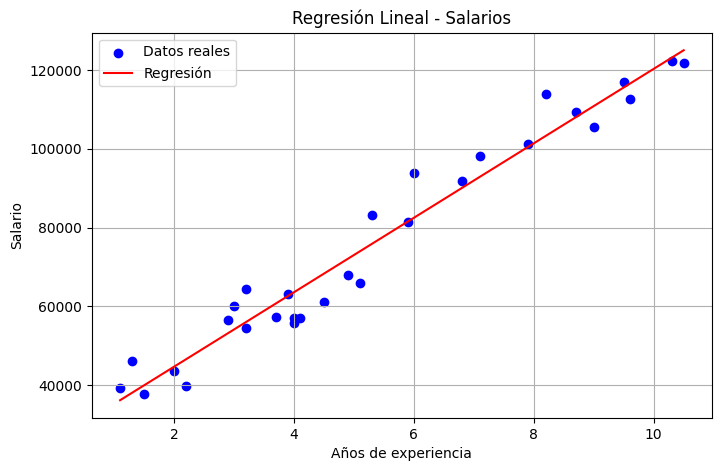

In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import joblib

# Cargar datos
df = pd.read_csv("Salary_Data.csv")
X = df[["YearsExperience"]]
y = df["Salary"]

# Modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Guardar modelo
joblib.dump(modelo, "modelo.pkl")

# Gráfico
plt.figure(figsize=(8,5))
plt.scatter(X, y, color="blue", label="Datos reales")
plt.plot(X, modelo.predict(X), color="red", label="Regresión")
plt.xlabel("Años de experiencia")
plt.ylabel("Salario")
plt.title("Regresión Lineal - Salarios")
plt.legend()
plt.grid(True)
plt.savefig("static/grafico.png")
plt.show()


In [5]:
import os
os.makedirs("static", exist_ok=True)

In [ ]:
from flask import Flask, render_template_string, request
from pyngrok import ngrok
import joblib

app = Flask(__name__)

html = '''
<!DOCTYPE html>
<html>
<head>
    <title>Predicción de Salario</title>
    <style>
        body { font-family: Arial; padding: 40px; background-color: #f8f9fa; }
        h1 { color: #333; }
        form { margin-top: 20px; }
        input[type="text"] { padding: 5px; }
        input[type="submit"] { padding: 5px 10px; }
        .resultado { margin-top: 20px; font-weight: bold; }
    </style>
</head>
<body>
    <h1>Modelo de Regresión Lineal</h1>
    <p>Predicción de salario según años de experiencia.</p>
    <img src="/static/grafico.png" width="500"/><br><br>
    <form method="post">
        <label>Años de experiencia:</label>
        <input type="text" name="experiencia">
        <input type="submit" value="Predecir">
    </form>
    {% if resultado %}
        <div class="resultado">Salario estimado: {{ resultado }}</div>
    {% endif %}
</body>
</html>
'''

@app.route("/", methods=["GET", "POST"])
def index():
    resultado = None
    if request.method == "POST":
        try:
            exp = float(request.form["experiencia"])
            try:
                modelo = joblib.load("modelo.pkl")
                pred = modelo.predict([[exp]])[0]
                resultado = f"${pred:,.2f}"
            except FileNotFoundError:
                resultado = "Error: Modelo no encontrado."
            except Exception as e:
                 resultado = f"Error al predecir: {e}"
        except ValueError:
            resultado = "Error: La entrada debe ser un número válido."
        except Exception as e:
            resultado = f"Ocurrió un error inesperado: {e}"
    return render_template_string(html, resultado=resultado)

ngrok.set_auth_token("2wvajDn4UqYZgJzkNtj8DmHNYTE_7TFLtTRpcwJ5zyJ29hPbH")

try:
    public_url = ngrok.connect(5000)
    print("🔗 Tu aplicación está disponible en:", public_url)
    app.run()
except Exception as e:
    print(f"Error al iniciar la aplicación o ngrok: {e}")

🔗 Tu aplicación está disponible en: NgrokTunnel: "https://7c1e-34-19-108-67.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [11/May/2025 00:56:00] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [11/May/2025 00:56:00] "GET /static/grafico.png HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [11/May/2025 00:56:01] "GET /favicon.ico HTTP/1.1" 404 -
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
INFO:werkzeug:127.0.0.1 - - [11/May/2025 00:56:04] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [11/May/2025 00:56:04] "GET /static/grafico.png HTTP/1.1" 304 -
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.